## Graph with Two Nodes

In [1]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph

/Users/zakwanzahid/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [8]:
def first_node(state: AgentState) -> AgentState:
    """ First node in the sequence """

    state["final"] = f"Hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """ Second node in the sequence """

    state["final"] += f" You are {state['age']} years old." # concatenate to previous message "+="

    return state

In [9]:
graph = StateGraph(AgentState) 

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")

graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()

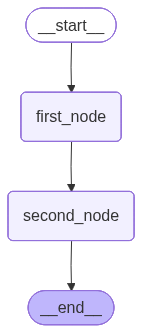

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [11]:
result = app.invoke({
    "name": "Alice",
    "age": "30"
})
print(result)

{'name': 'Alice', 'age': '30', 'final': 'Hi Alice! You are 30 years old.'}


## Graph With Three Nodes

In [12]:
class AgentState(TypedDict):
    name: str
    age: str
    skill: str

In [13]:
def first_node(state: AgentState) -> AgentState:
    """ First node in the sequence """

    state["final"] = f"Hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """ Second node in the sequence """

    state["final"] += f" You are {state['age']} years old." # concatenate to previous message "+="


def third_node(state: AgentState) -> AgentState:
    """ Third node in the sequence """

    state["final"] += f" You have skills in {state['skill']}."

    return state

In [20]:
graph = StateGraph(AgentState) 

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")

graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")
app = graph.compile()

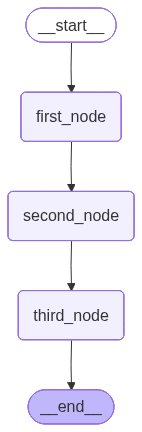

In [21]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [22]:
result = app.invoke({
    "name": "Alice",
    "age": "30",
    "skill": "Python programming"
})
print(result)

KeyError: 'final'